In [1]:
# Importing required modules
from pymongo import MongoClient
from pandas import DataFrame
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Python Program for demonstrating the PyMongo Cursor to Pandas DataFrame
# Connecting to MongoDB server
# client = MongoClient('host_name','port_number')
client = MongoClient('localhost', 27017)

# Connecting to the database
mydatabase = client.test

In [3]:
# Accessing the collection named
mycollection = mydatabase.project_Ml

# Now creating a Cursor instance using find() function
cursor = mycollection.find()

In [4]:
# Converting cursor to the list of dictionaries
list_cur = list(cursor)

In [5]:
# Converting to the DataFrame
machine_learning_df = DataFrame(list_cur)

In [6]:
# Printing the df to console
machine_learning_df.head()

,_id,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowerDescription,Hours,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,Total_Price,Type
0,6246ff4abc504654d1d24935,536408,84879,8,2010-12-01 05:00:00,1.69,14307.0,United Kingdom,assorted colour bird ornament,11,2010,12,1,4,335,48,13.52,WeekDay
1,6246ff4abc504654d1d24936,536409,22074,1,2010-12-01 05:00:00,1.65,17908.0,United Kingdom,6 ribbons shimmering pinks,11,2010,12,1,4,335,48,1.65,WeekDay
2,6246ff4abc504654d1d24937,536409,90199C,2,2010-12-01 05:00:00,6.35,17908.0,United Kingdom,5 strand glass necklace crystal,11,2010,12,1,4,335,48,12.70,WeekDay
3,6246ff4abc504654d1d24938,536488,22150,1,2010-12-01 05:00:00,1.95,17897.0,United Kingdom,3 stripey mice feltcraft,12,2010,12,1,4,335,48,1.95,WeekDay
4,6246ff4abc504654d1d24939,536522,22566,1,2010-12-01 05:00:00,0.85,15012.0,United Kingdom,feltcraft hairband pink and purple,12,2010,12,1,4,335,48,0.85,WeekDay


In [7]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(machine_learning_df['Type'],drop_first=True)
# Drop column Type as it is now encoded
machine_learning_df = machine_learning_df.drop('Type',axis = 1)
# Join the encoded df
machine_learning_df = machine_learning_df.join(one_hot)
machine_learning_df.rename(columns={'WeekDay' : 'Type'}, inplace = True)

In [8]:
#Grouping the data on InvoiceDate and StockCode
ml_df = machine_learning_df.groupby(['InvoiceDate','StockCode'],as_index=False).sum()
ml_df.InvoiceDate = pd.to_datetime(ml_df.InvoiceDate)

In [9]:
#Taking Features for machine learning
machine_learning = ml_df[['Quantity','year','month','UnitPrice','Hours','Total_Price','dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear','Type']]

In [10]:
machine_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222252 entries, 0 to 222251
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     222252 non-null  int64  
 1   year         222252 non-null  int64  
 2   month        222252 non-null  int64  
 3   UnitPrice    222252 non-null  float64
 4   Hours        222252 non-null  int64  
 5   Total_Price  222252 non-null  float64
 6   dayofmonth   222252 non-null  int64  
 7   dayofweek    222252 non-null  int64  
 8   dayofyear    222252 non-null  int64  
 9   weekofyear   222252 non-null  int64  
 10  Type         222252 non-null  uint8  
dtypes: float64(2), int64(8), uint8(1)
memory usage: 18.9 MB


# Machine Learning Algorithm's

# 1. Linear Regression

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X = machine_learning.drop("Total_Price",axis=1)

y = machine_learning['Total_Price']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=2021)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)** 0.5))

Mean Squared Error:  309.9642069879385
Mean Absolute Error:  21.51478070867031
R2 Score:  0.8185241089018329
Root Mean Squared Error: 17.60580037907787


# 2. Ridge Regression

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.01)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)** 0.5))

Mean Squared Error:  309.9642063460851
Mean Absolute Error:  21.514780635663477
R2 Score:  0.8185241096534094
Root Mean Squared Error: 17.605800360849408


# 3. Lasso Regression

In [13]:
#################################LASSO#####################################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso

clf = Lasso(alpha=0.01)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)** 0.5))

Mean Squared Error:  309.4682164522854
Mean Absolute Error:  21.511847460703812
R2 Score:  0.8191044230620217
Root Mean Squared Error: 17.591708741685252


/home/hduser/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1171537368.518114, tolerance: 363922.82341973897
  positive)


# 4. Random Forest

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=2021)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)** 0.5))

Mean Squared Error:  705.7850605570274
Mean Absolute Error:  5.986818334534373
R2 Score:  0.059105853169835854
Root Mean Squared Error: 26.56661552695464


# 5. Bagging Regressor

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingRegressor


# Default: Tree Regressor
model_bg = BaggingRegressor(random_state=2021,oob_score=True,
                            max_features = X_train.shape[1],
                            n_estimators=15,
                            max_samples=X_train.shape[0])

#### building the model ######
model_bg.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_bg.oob_score_))

y_pred = model_bg.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)** 0.5))

/home/hduser/.local/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Out of Bag Score = 0.5098
Mean Squared Error:  706.7832012420857
Mean Absolute Error:  6.008135948967159
R2 Score:  0.05644269447468808
Root Mean Squared Error: 26.58539450980718


# 6. Bagging Regressor With Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lr = LinearRegression()

model_bg = BaggingRegressor(base_estimator = lr,
                            random_state=2021,oob_score=True,
                            max_features = X_train.shape[1],
                            n_estimators=15,
                            max_samples=X_train.shape[0])

#### building the model ######
model_bg.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_bg.oob_score_))

y_pred = model_bg.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred) ** 0.5)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)** 0.5))

Out of Bag Score = 0.3441
Mean Squared Error:  306.4829618811514
Mean Absolute Error:  21.52138374700065
R2 Score:  0.8225775727926972
Root Mean Squared Error: 17.506654788426925


/home/hduser/.local/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


# CLUSTERING ON RFM

In [17]:
machine_learning_df.head()

,_id,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowerDescription,Hours,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,Total_Price,Type
0,6246ff4abc504654d1d24935,536408,84879,8,2010-12-01 05:00:00,1.69,14307.0,United Kingdom,assorted colour bird ornament,11,2010,12,1,4,335,48,13.52,1
1,6246ff4abc504654d1d24936,536409,22074,1,2010-12-01 05:00:00,1.65,17908.0,United Kingdom,6 ribbons shimmering pinks,11,2010,12,1,4,335,48,1.65,1
2,6246ff4abc504654d1d24937,536409,90199C,2,2010-12-01 05:00:00,6.35,17908.0,United Kingdom,5 strand glass necklace crystal,11,2010,12,1,4,335,48,12.70,1
3,6246ff4abc504654d1d24938,536488,22150,1,2010-12-01 05:00:00,1.95,17897.0,United Kingdom,3 stripey mice feltcraft,12,2010,12,1,4,335,48,1.95,1
4,6246ff4abc504654d1d24939,536522,22566,1,2010-12-01 05:00:00,0.85,15012.0,United Kingdom,feltcraft hairband pink and purple,12,2010,12,1,4,335,48,0.85,1


In [18]:
# Changing the datatype of Customer Id
machine_learning_df['CustomerID'] = machine_learning_df['CustomerID'].astype(str)

In [19]:
# New Attribute : Monetary
rfm_monetary = machine_learning_df.groupby('CustomerID')['Total_Price'].sum()
rfm_monetary = rfm_monetary.reset_index()
rfm_monetary.columns = ['CustomerID', 'Monetary'] #total_price=monetary
rfm_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [20]:
# New Attribute : Frequency
rfm_frequency = machine_learning_df.groupby('CustomerID')['InvoiceNo'].count()
rfm_frequency = rfm_frequency.reset_index()
rfm_frequency.columns = ['CustomerID', 'Frequency']
rfm_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
# Merging the two dfs
rfm = pd.merge(rfm_monetary, rfm_frequency, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [22]:
#integers to date time
machine_learning_df['InvoiceDate'] = pd.to_datetime(machine_learning_df['InvoiceDate'])

In [23]:
max_date = max(machine_learning_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 05:00:00')

In [24]:
machine_learning_df['Recency'] = max_date - machine_learning_df['InvoiceDate']
machine_learning_df.head()

,_id,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowerDescription,Hours,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,Total_Price,Type,Recency
0,6246ff4abc504654d1d24935,536408,84879,8,2010-12-01 05:00:00,1.69,14307.0,United Kingdom,assorted colour bird ornament,11,2010,12,1,4,335,48,13.52,1,373 days
1,6246ff4abc504654d1d24936,536409,22074,1,2010-12-01 05:00:00,1.65,17908.0,United Kingdom,6 ribbons shimmering pinks,11,2010,12,1,4,335,48,1.65,1,373 days
2,6246ff4abc504654d1d24937,536409,90199C,2,2010-12-01 05:00:00,6.35,17908.0,United Kingdom,5 strand glass necklace crystal,11,2010,12,1,4,335,48,12.70,1,373 days
3,6246ff4abc504654d1d24938,536488,22150,1,2010-12-01 05:00:00,1.95,17897.0,United Kingdom,3 stripey mice feltcraft,12,2010,12,1,4,335,48,1.95,1,373 days
4,6246ff4abc504654d1d24939,536522,22566,1,2010-12-01 05:00:00,0.85,15012.0,United Kingdom,feltcraft hairband pink and purple,12,2010,12,1,4,335,48,0.85,1,373 days


In [25]:
# Compute last transaction date to get the recency of customers
rfm_recency = machine_learning_df.groupby('CustomerID')['Recency'].min()
rfm_recency = rfm_recency.reset_index()
rfm_recency['Recency'] = rfm_recency['Recency'].dt.days
rfm_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [26]:
rfm = pd.merge(rfm, rfm_recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310


In [27]:
# Removing (statistical) outliers for Monetary
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [28]:
# Rescaling the attributes
rfm_df = rfm[['Monetary', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4254, 3)

In [29]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.643456,1.079245,-0.912275
1,0.262150,-0.456729,-0.183906
2,0.240332,-0.029505,-0.752633
3,-0.541998,-0.599137,2.160843
4,0.651789,0.092560,-0.573035


In [30]:
# Create a KMeans instance with clusters: model
model = KMeans(n_clusters=3,random_state=2021)

# Fit model to points
model.fit(rfm_df_scaled)

KMeans(n_clusters=3, random_state=2021)

In [31]:
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(rfm_df_scaled)

sil_score = silhouette_score(rfm_df_scaled,labels)
print(sil_score)

0.5104792107123184


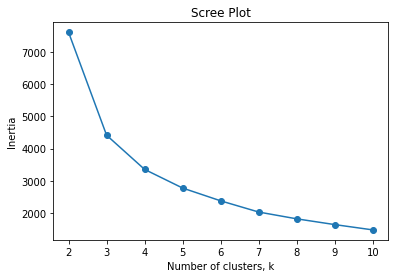

In [32]:
clustNos = [2,3,4,5,6,7,8,9,10]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=2021)
    model.fit(rfm_df_scaled)
    Inertia.append(model.inertia_)
    
# Import pyplot
import matplotlib.pyplot as plt

plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

In [33]:
# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=4,random_state=2021)

# Fit model to points
model.fit(rfm_df_scaled)



KMeans(n_clusters=4, random_state=2021)

In [36]:
# Determine the cluster labels of new_points: labels
labels = model.predict(rfm_df_scaled)
sil_score = silhouette_score(rfm_df_scaled,labels)
print(sil_score)

0.4786122939242315


In [34]:
#model.n_init
clusterID = pd.DataFrame({'ClustID':labels},index=rfm_df.index)
clusteredData = pd.concat([rfm_df,clusterID],
                          axis='columns')

clusteredData.sort_values('ClustID')

,Monetary,Frequency,Recency,ClustID
2171,205.30,12,95,0
2449,781.28,110,24,0
2450,1333.68,78,9,0
2451,1426.16,53,25,0
2452,193.75,10,117,0
...,...,...,...,...
2896,5360.63,162,25,3
2891,2248.99,118,21,3
772,3312.25,158,60,3
2916,1582.80,151,28,3


In [35]:
clusteredData.groupby('ClustID').mean()

,Monetary,Frequency,Recency
ClustID,,,
0,691.684262,40.684944,50.262472
1,6800.063288,365.387387,19.531532
2,427.710639,25.252456,251.920432
3,2703.144767,159.105196,31.475285
